<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/2348549_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df= pd.read_csv('/content/data - data.csv')

In [3]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02-05-2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,02-05-2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,02-05-2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,02-05-2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,02-05-2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
jk=df['yr_built'].unique()
jk

array([1955, 1921, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1909,
       1980, 1939, 1965, 1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991,
       1959, 1920, 1979, 1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957,
       1978, 1974, 1950, 1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929,
       2006, 2008, 2009, 2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928,
       1982, 1960, 2003, 1998, 1942, 1908, 1958, 1971, 1975, 1961, 1924,
       1902, 1962, 1953, 1999, 1994, 1930, 1984, 2010, 1912, 1947, 1916,
       1940, 1970, 1952, 1964, 1926, 1905, 1969, 1903, 1943, 1993, 1946,
       1910, 1904, 1981, 1906, 1922, 2011, 2002, 1917, 1913, 1914, 1937,
       1925, 1932, 1918, 1972, 1941, 1919, 1936, 1911, 1927, 1931, 1901,
       1907, 1915, 1935, 1933, 1934])

In [5]:
yr_built_bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
df['yr_built_Binned'] = pd.cut(df['yr_built'], bins=yr_built_bins, labels=False)
sqft_above_bins = [0, 1000, 1500, 2000, 2500, 3000, np.inf]
df['sqft_above_Binned'] = pd.cut(df['sqft_above'], bins=sqft_above_bins, labels=False)

In [6]:
df.info


<bound method DataFrame.info of                  date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 0:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 0:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 0:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 0:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 0:00  5.500000e+05         4       2.50         1940   
...               ...           ...       ...        ...          ...   
4595  09-07-2014 0:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 0:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 0:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 0:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 0:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5  

In [7]:
df.describe

<bound method NDFrame.describe of                  date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 0:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 0:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 0:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 0:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 0:00  5.500000e+05         4       2.50         1940   
...               ...           ...       ...        ...          ...   
4595  09-07-2014 0:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 0:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 0:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 0:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 0:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5

In [8]:
df.isnull().sum()

date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
street                0
city                  0
statezip              0
country               0
yr_built_Binned      22
sqft_above_Binned     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns[13:]:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_Binned,sqft_above_Binned
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,50,1522,36,62,0,2,1
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,1,5
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,3,2
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,3,0
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,37,4352,31,31,0,3,1


In [11]:
df=df.drop(['date'], axis= 1)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_Binned,sqft_above_Binned
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,50,1522,36,62,0,2,1
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,1,5
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,3,2
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,3,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,37,4352,31,31,0,3,1


<Axes: >

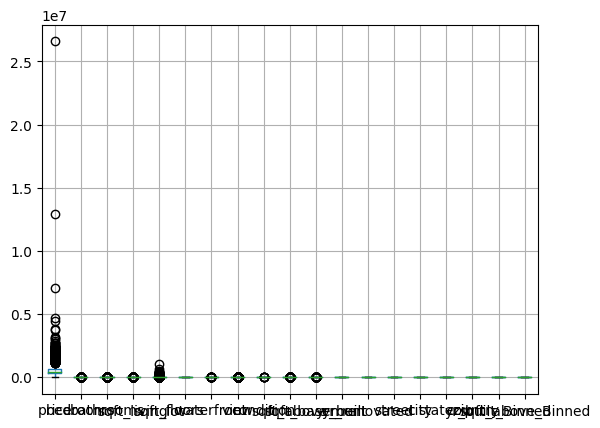

In [13]:
df.boxplot()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              4600 non-null   float64
 1   bedrooms           4600 non-null   int64  
 2   bathrooms          4600 non-null   float64
 3   sqft_living        4600 non-null   int64  
 4   sqft_lot           4600 non-null   int64  
 5   floors             4600 non-null   float64
 6   waterfront         4600 non-null   int64  
 7   view               4600 non-null   int64  
 8   condition          4600 non-null   int64  
 9   sqft_above         4600 non-null   int64  
 10  sqft_basement      4600 non-null   int64  
 11  yr_built           4600 non-null   int64  
 12  yr_renovated       4600 non-null   int64  
 13  street             4600 non-null   int64  
 14  city               4600 non-null   int64  
 15  statezip           4600 non-null   int64  
 16  country            4600 

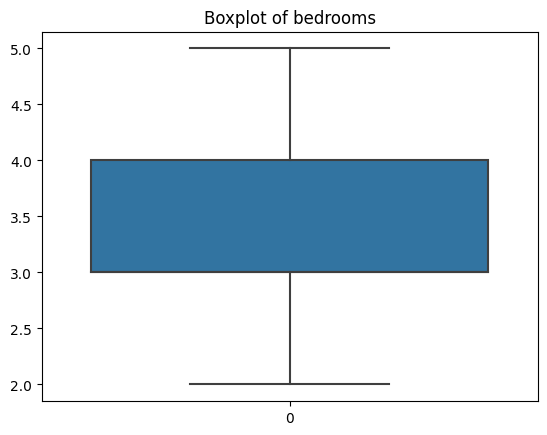

In [15]:
for i in df['bedrooms']:
    q1=df['bedrooms'].quantile(0.25)
    q3=df['bedrooms'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['bedrooms']= df['bedrooms'].replace(i,np.mean(df['bedrooms']))
sns.boxplot(df['bedrooms'])
plt.title("Boxplot of bedrooms")
plt.show()

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_Binned,sqft_above_Binned
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,50,1522,36,62,0,2,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,1,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,3,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,3,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,37,4352,31,31,0,3,1


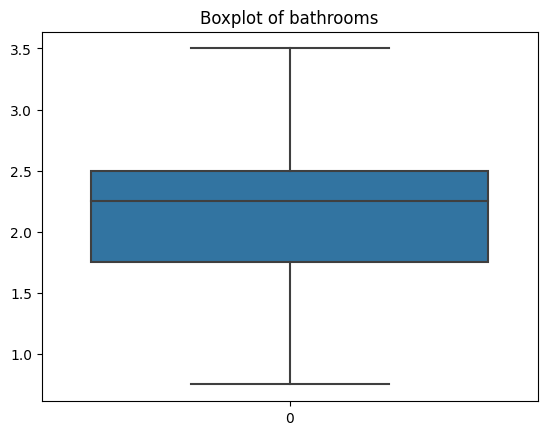

In [17]:
for i in df['bathrooms']:
    q1=df['bathrooms'].quantile(0.25)
    q3=df['bathrooms'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['bathrooms']= df['bathrooms'].replace(i,np.mean(df['bathrooms']))
sns.boxplot(df['bathrooms'])
plt.title("Boxplot of bathrooms")
plt.show()

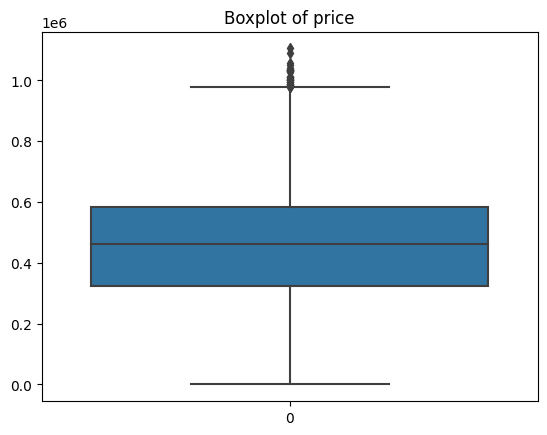

In [18]:
for i in df['price']:
    q1=df['price'].quantile(0.25)
    q3=df['price'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['price']= df['price'].replace(i,np.mean(df['price']))
sns.boxplot(df['price'])
plt.title("Boxplot of price")
plt.show()

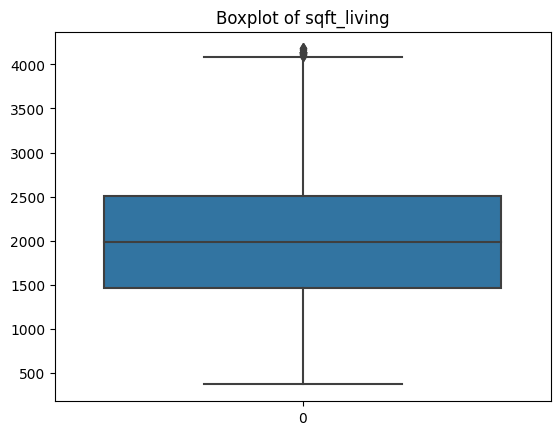

In [19]:
for i in df['sqft_living']:
    q1=df['sqft_living'].quantile(0.25)
    q3=df['sqft_living'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['sqft_living']= df['sqft_living'].replace(i,np.mean(df['sqft_living']))
sns.boxplot(df['sqft_living'])
plt.title("Boxplot of sqft_living")
plt.show()

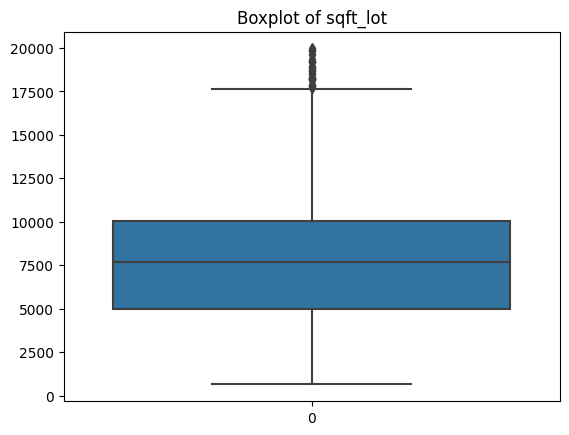

In [20]:
for i in df['sqft_lot']:
    q1=df['sqft_lot'].quantile(0.25)
    q3=df['sqft_lot'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['sqft_lot']= df['sqft_lot'].replace(i,np.mean(df['sqft_lot']))
sns.boxplot(df['sqft_lot'])
plt.title("Boxplot of sqft_lot")
plt.show()

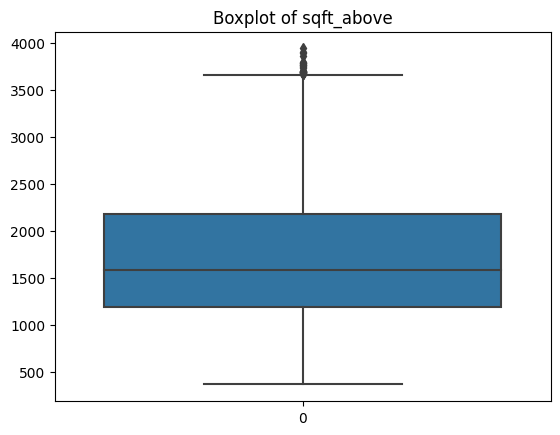

In [21]:
for i in df[ 'sqft_above']:
    q1=df['sqft_above'].quantile(0.25)
    q3=df['sqft_above'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['sqft_above']= df['sqft_above'].replace(i,np.mean(df['sqft_above']))
sns.boxplot(df['sqft_above'])
plt.title("Boxplot of sqft_above")
plt.show()

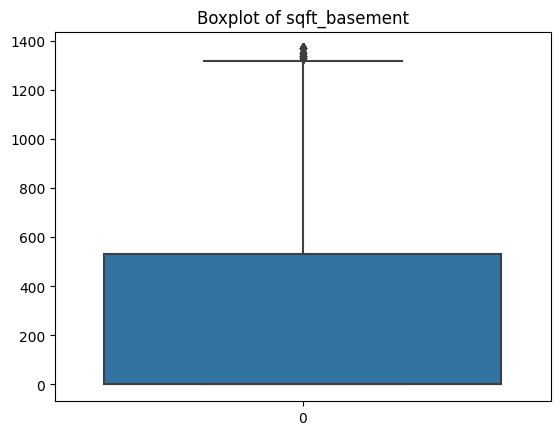

In [22]:

for i in df[ 'sqft_basement']:
    q1=df['sqft_basement'].quantile(0.25)
    q3=df['sqft_basement'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['sqft_basement']= df['sqft_basement'].replace(i,np.mean(df['sqft_basement']))
sns.boxplot(df['sqft_basement'])
plt.title("Boxplot of sqft_basement")
plt.show()

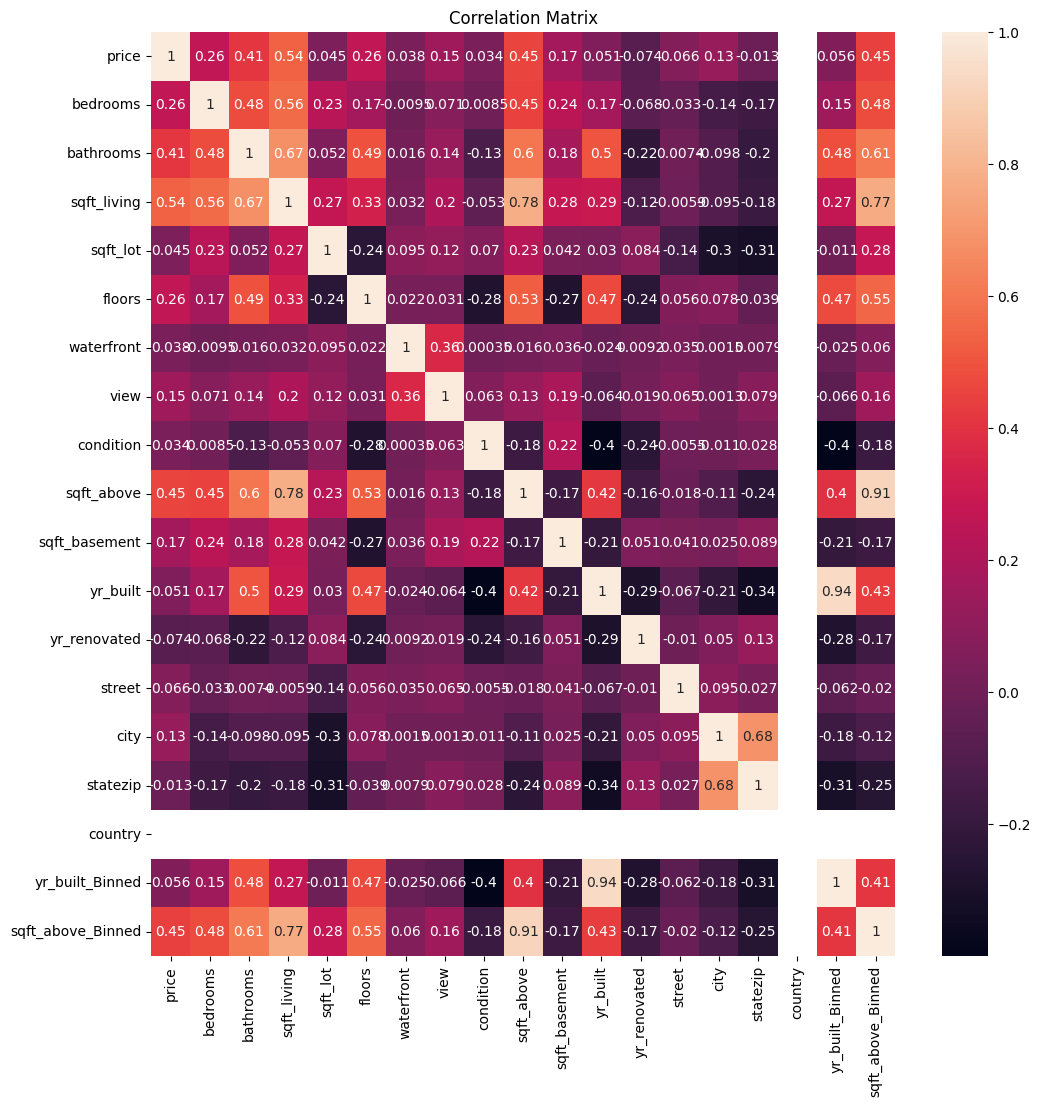

In [23]:
plt.figure(figsize=(12, 12))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              4600 non-null   float64
 1   bedrooms           4600 non-null   float64
 2   bathrooms          4600 non-null   float64
 3   sqft_living        4600 non-null   float64
 4   sqft_lot           4600 non-null   float64
 5   floors             4600 non-null   float64
 6   waterfront         4600 non-null   int64  
 7   view               4600 non-null   int64  
 8   condition          4600 non-null   int64  
 9   sqft_above         4600 non-null   float64
 10  sqft_basement      4600 non-null   float64
 11  yr_built           4600 non-null   int64  
 12  yr_renovated       4600 non-null   int64  
 13  street             4600 non-null   int64  
 14  city               4600 non-null   int64  
 15  statezip           4600 non-null   int64  
 16  country            4600 

In [25]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['bedrooms'])

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

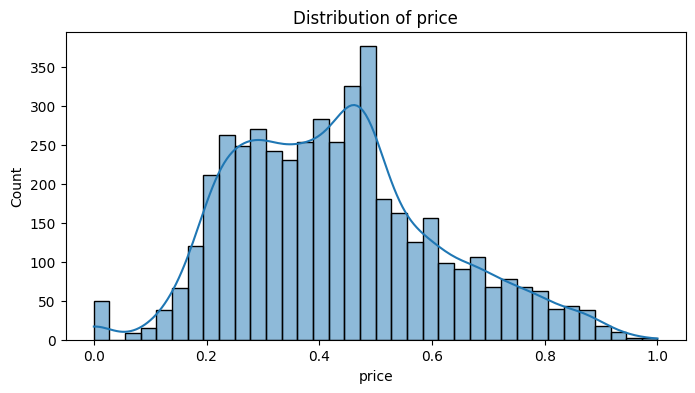

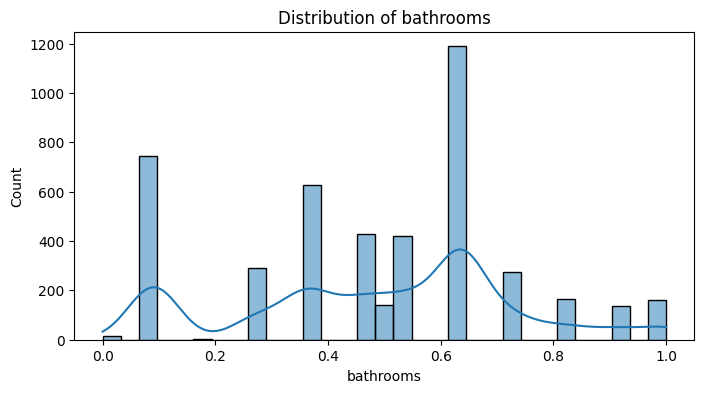

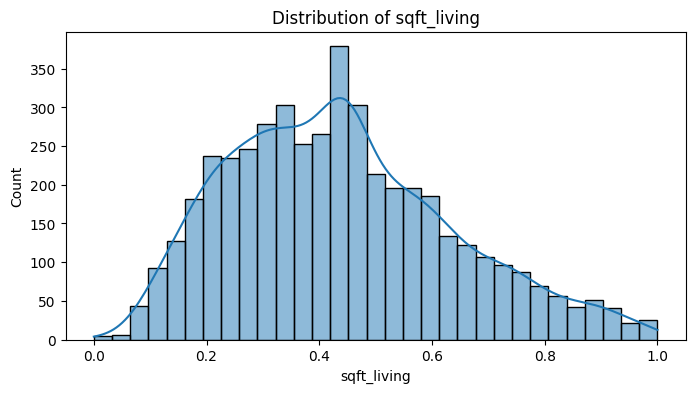

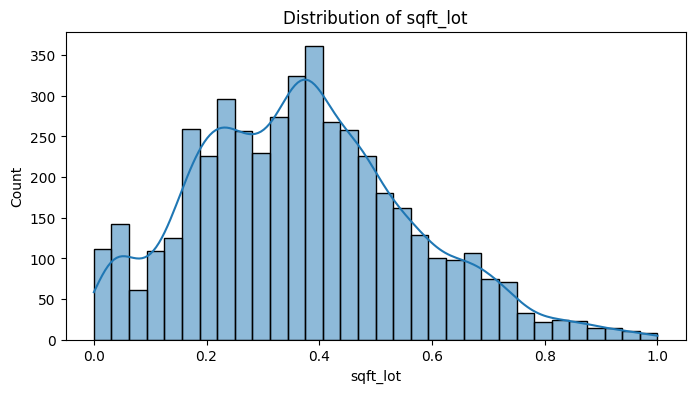

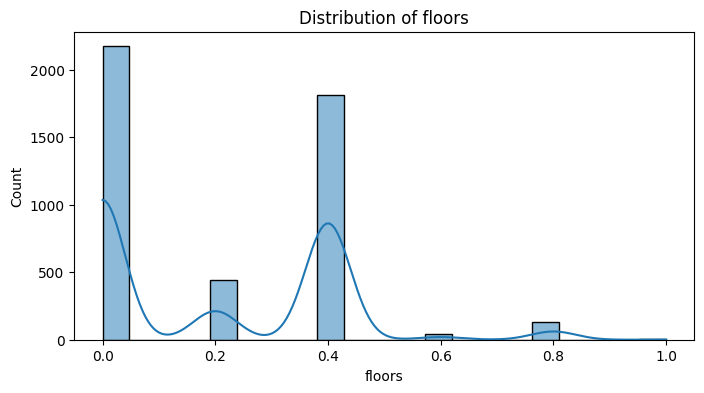

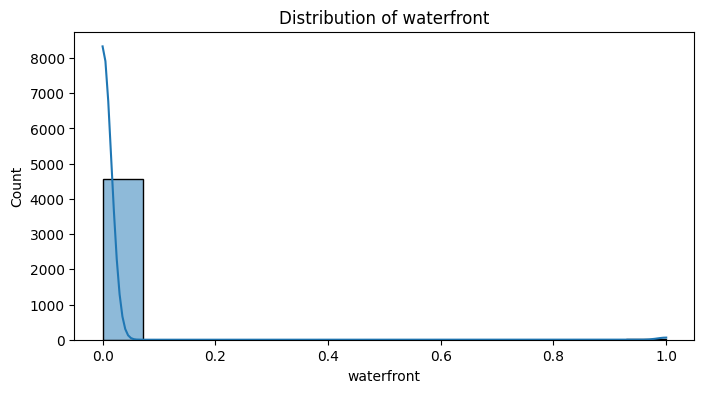

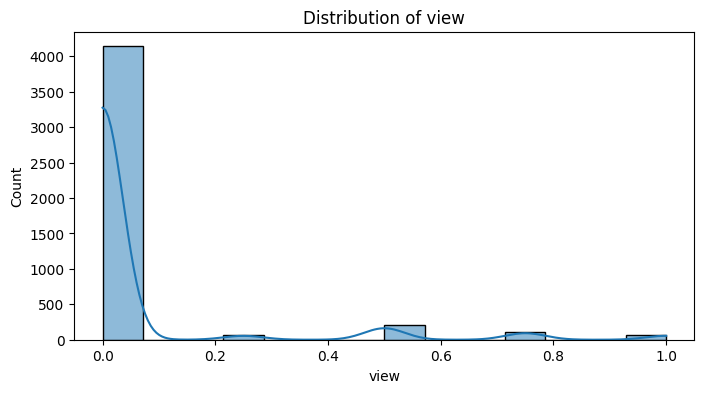

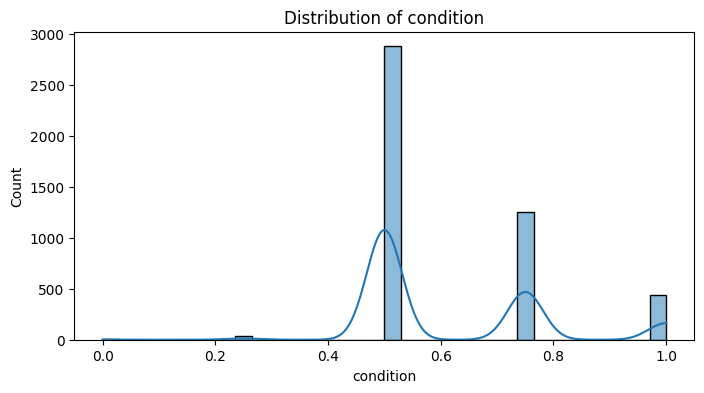

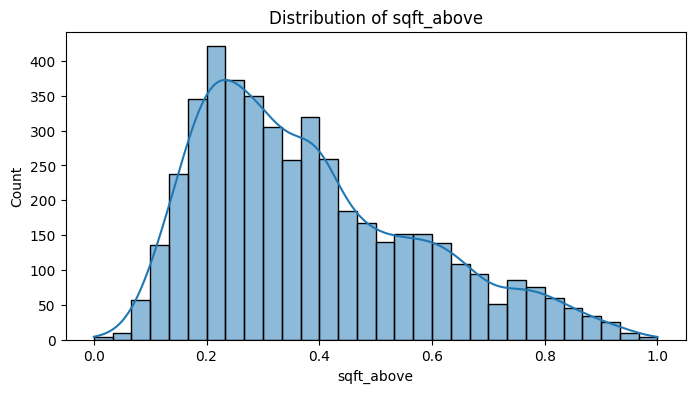

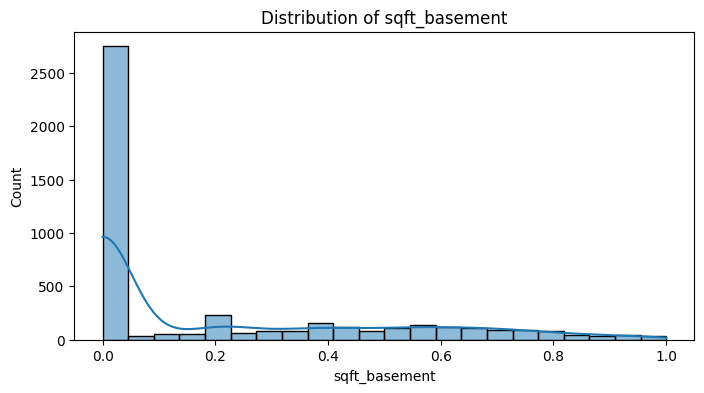

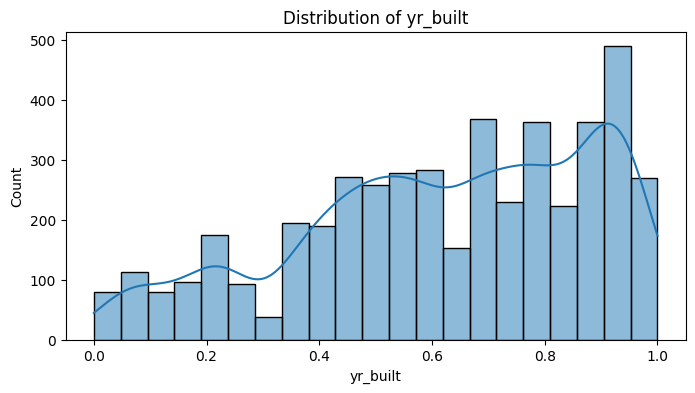

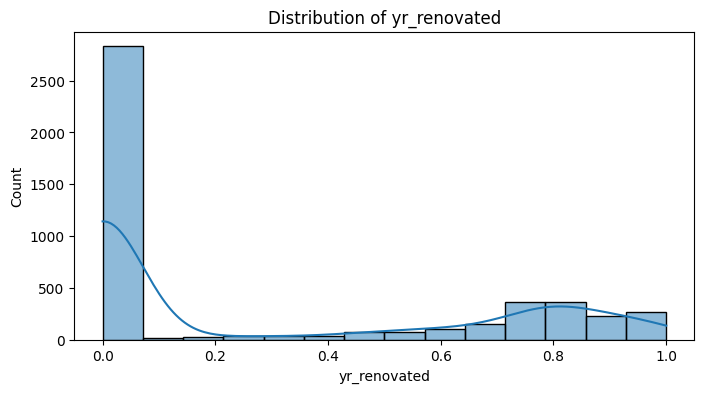

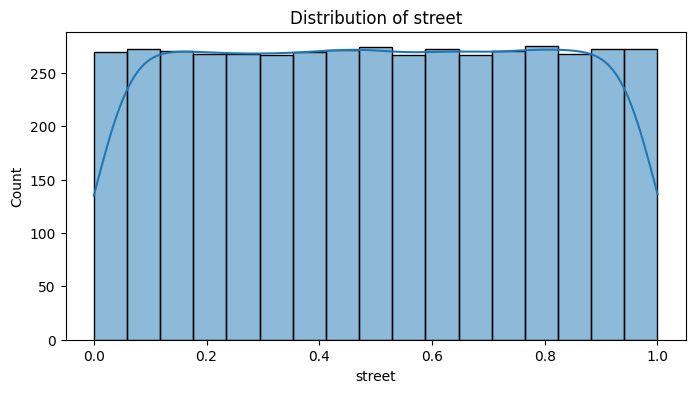

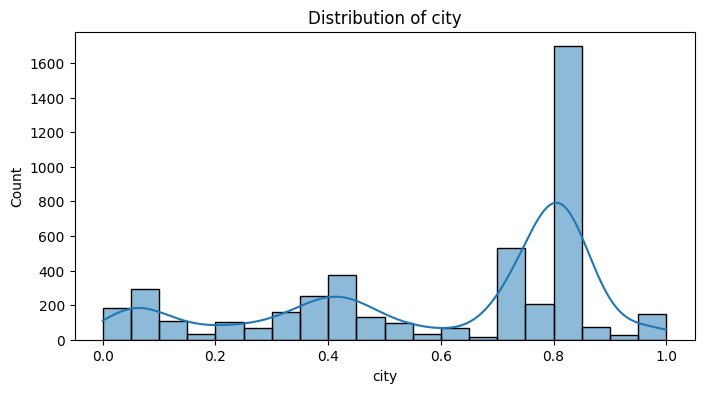

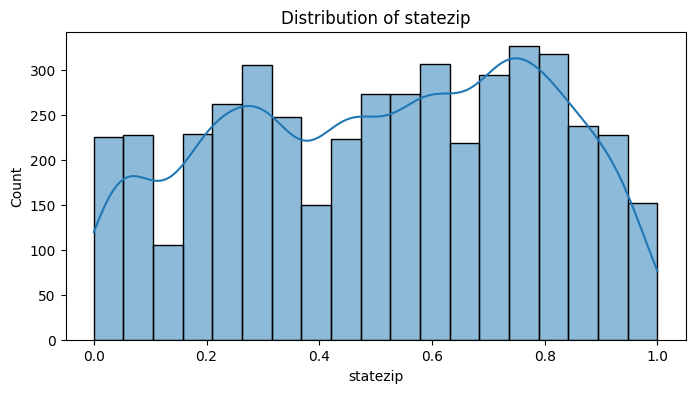

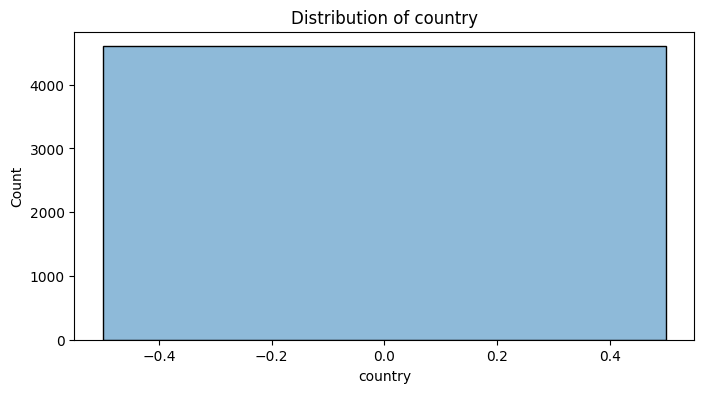

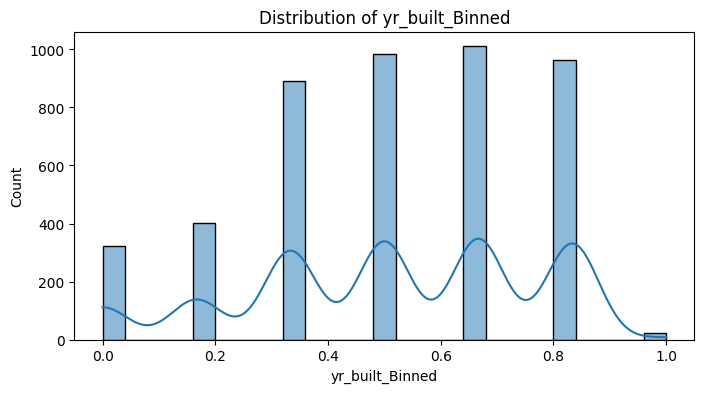

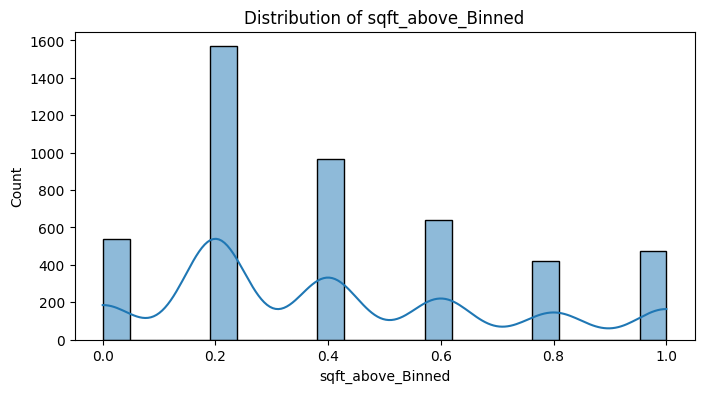

In [26]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['bedrooms'])

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

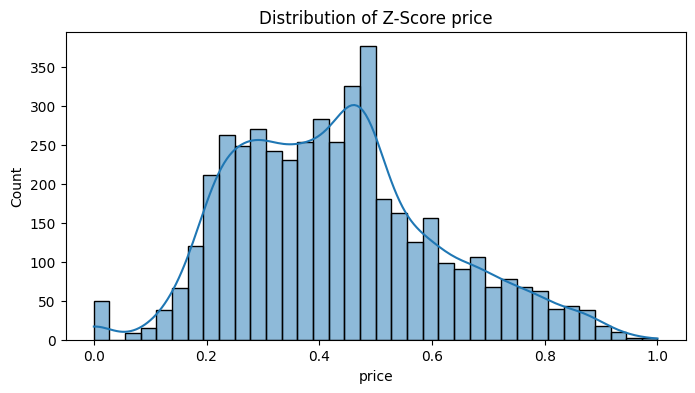

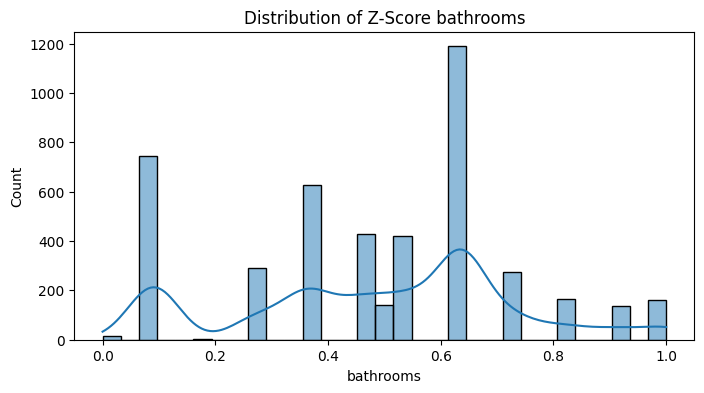

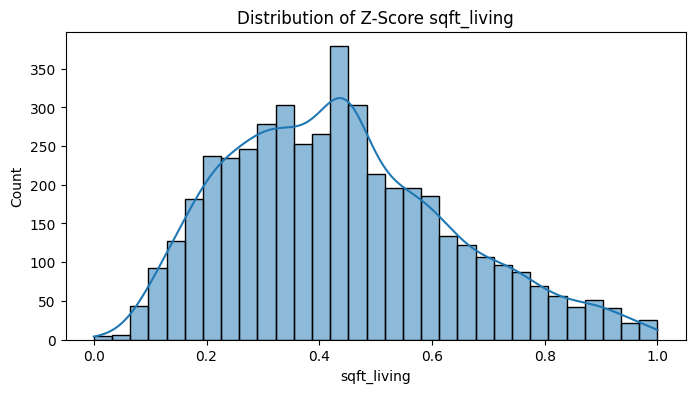

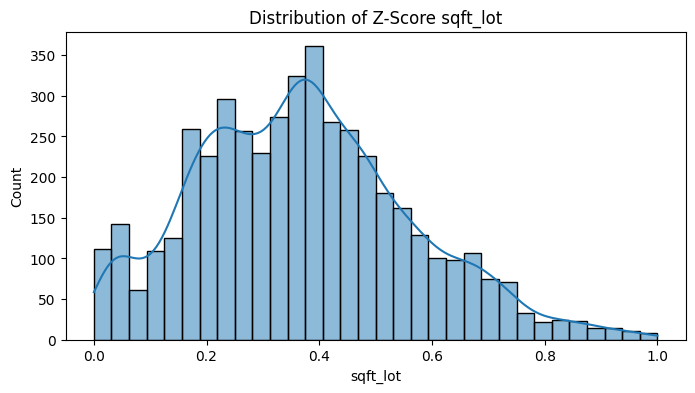

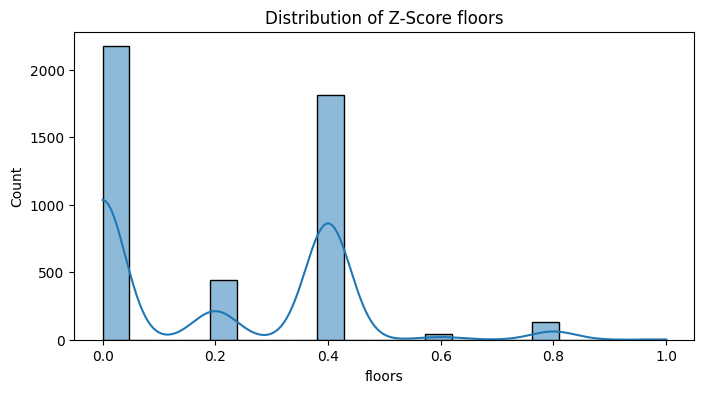

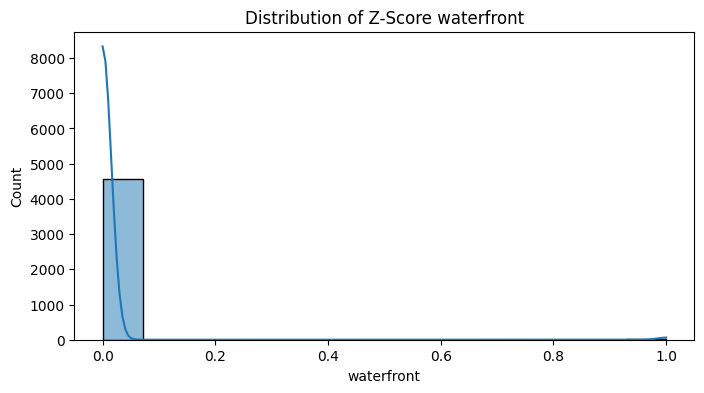

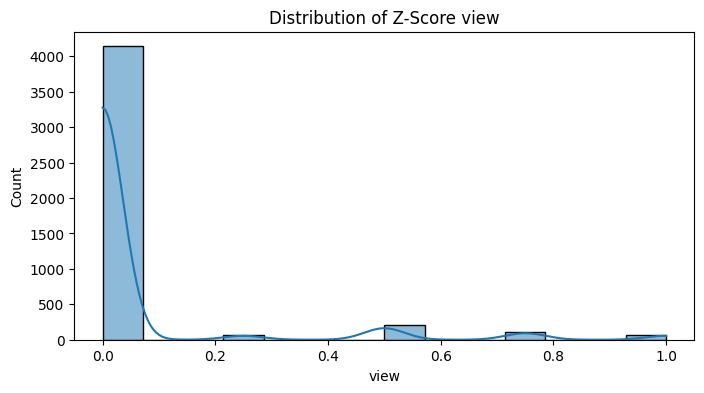

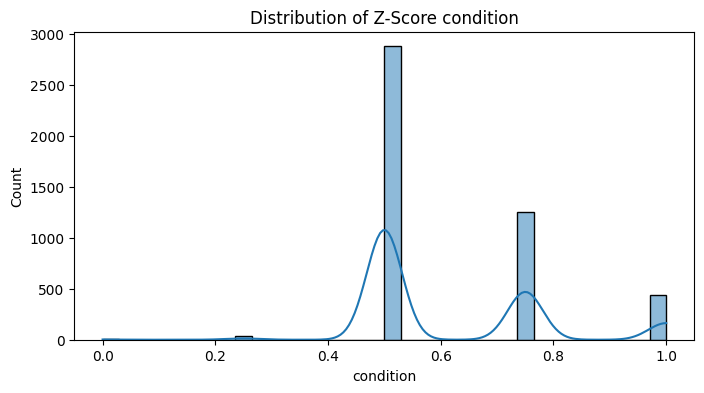

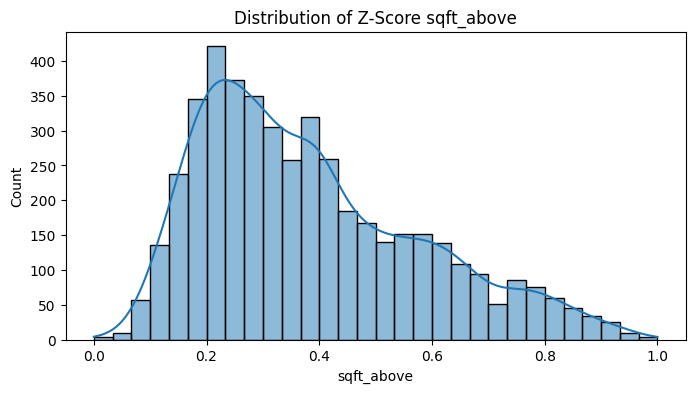

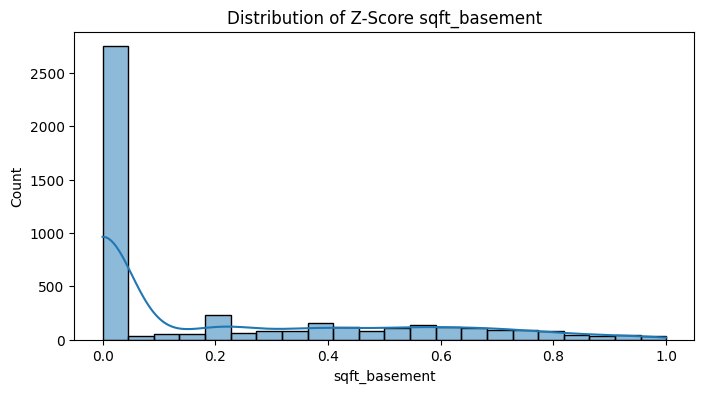

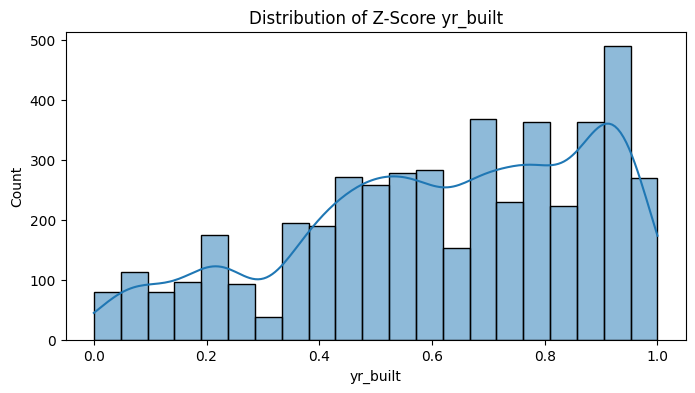

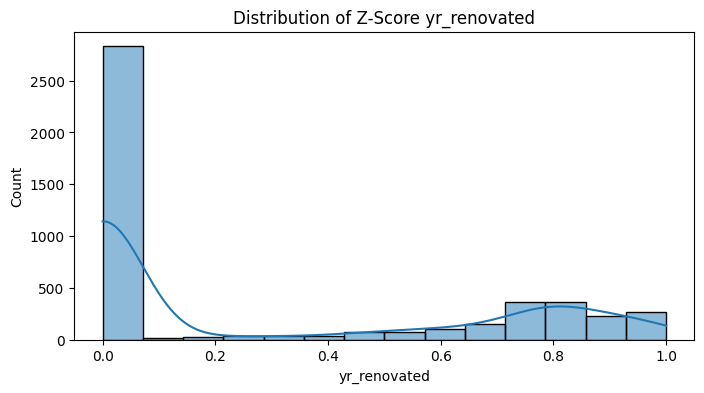

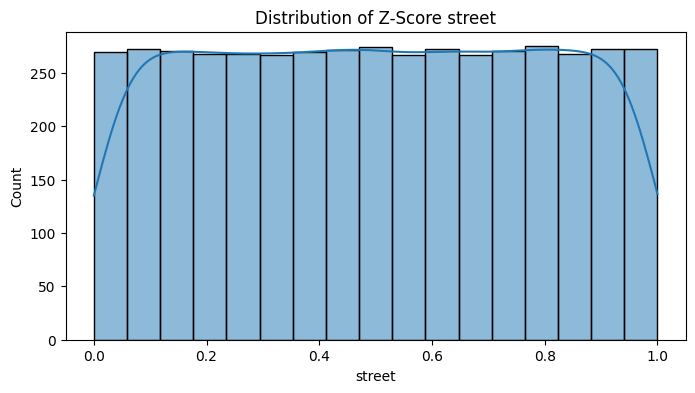

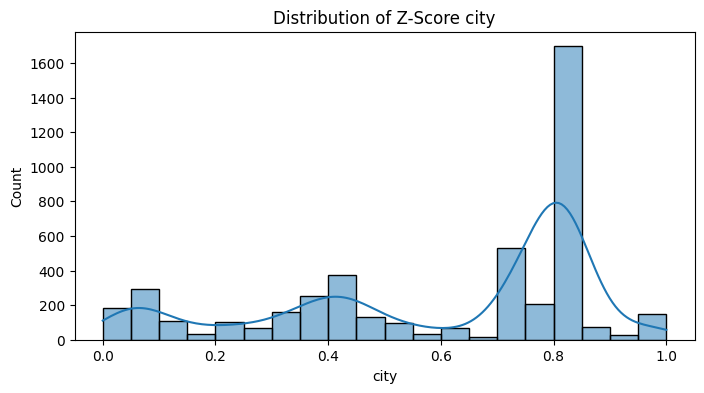

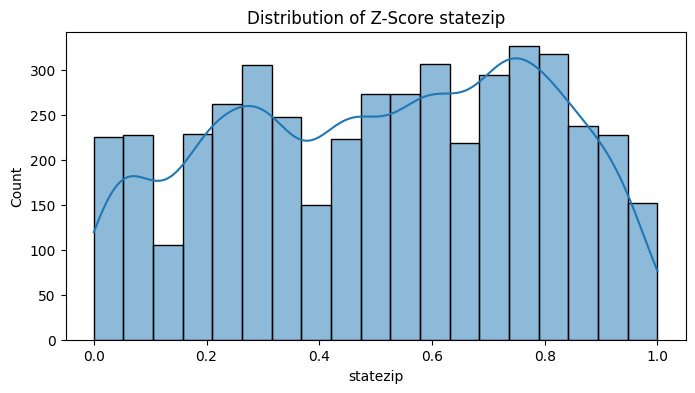

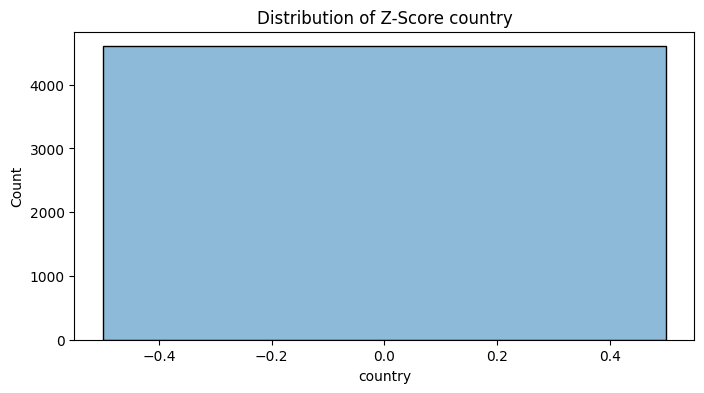

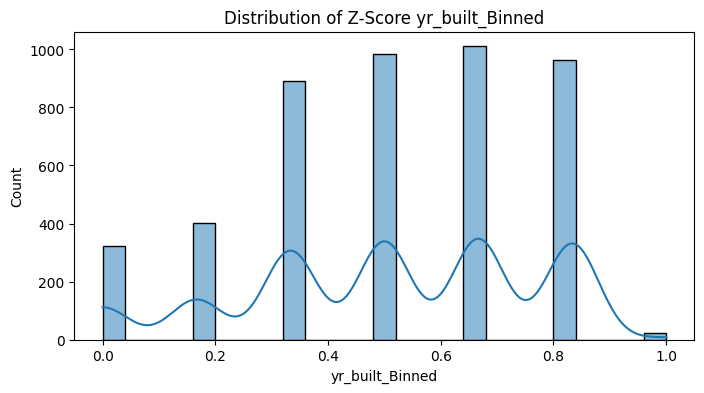

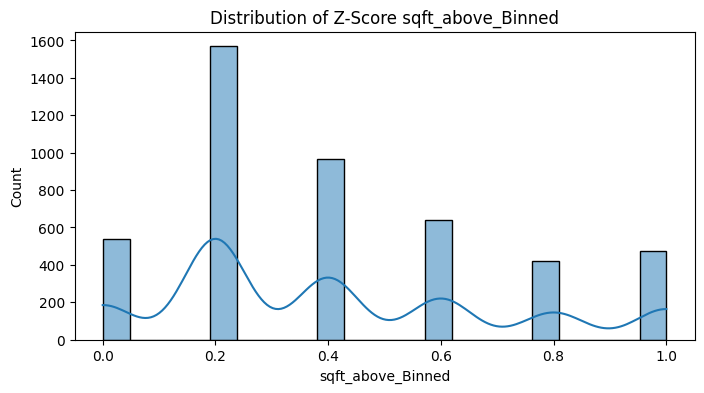

In [27]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of Z-Score {column}')
    plt.show()

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_Binned,sqft_above_Binned
0,0.283258,3.0,0.272727,0.254593,0.376345,0.2,0.0,0.0,0.50,0.271709,0.000000,0.482456,0.847458,0.336428,0.837209,0.815789,0.0,0.333333,0.2
1,0.499514,5.0,0.636364,0.860892,0.435224,0.4,0.0,1.0,1.00,0.840336,0.204380,0.184211,0.000000,0.861848,0.813953,0.763158,0.0,0.166667,1.0
2,0.309502,3.0,0.454545,0.409449,0.585110,0.0,0.0,0.0,0.75,0.436975,0.000000,0.578947,0.000000,0.506410,0.418605,0.342105,0.0,0.500000,0.4
3,0.380090,3.0,0.545455,0.427822,0.382450,0.0,0.0,0.0,0.75,0.176471,0.729927,0.552632,0.000000,0.942308,0.069767,0.092105,0.0,0.500000,0.0
4,0.497738,4.0,0.636364,0.412073,0.510244,0.0,0.0,0.0,0.75,0.215686,0.583942,0.666667,0.627119,0.961981,0.720930,0.407895,0.0,0.500000,0.2


In [29]:
df['bedrooms'] = df['bedrooms'].round().astype(int)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = df.drop('bedrooms', axis=1)
y = df['bedrooms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [31]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.5206521739130435
              precision    recall  f1-score   support

           2       0.40      0.71      0.51       104
           3       0.58      0.54      0.56       406
           4       0.58      0.54      0.56       332
           5       0.14      0.08      0.10        78

    accuracy                           0.52       920
   macro avg       0.42      0.47      0.43       920
weighted avg       0.52      0.52      0.51       920

